# **GRIP : THE SPARK FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

**AUTHOR- BRISTI CHATTERJEE**

**TASK 2 - Prediction Using Unsupervised ML**

**In the task from the given 'Iris' dataset, we have to predict the optimum number of clusters and represent it visually.**

**Step 1:- Importing all libaries and loading the dataset.**

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np

In [2]:
# Loading the iris dataset

In [3]:
iris=pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**There are three unique species in the data. So the model would be considered effective if it is able to find out the number of clusters as 3.**

**Step 2 :- Data Scaling**

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= iris.iloc[:, 1:5]

scaler.fit(x)
print("Data scaled successfully")
x1 =scaler.transform(x)
x = pd.DataFrame(x1, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

Data scaled successfully


**Step 3 :- Determining the optimum number of clusters using Elbow method.**

In [7]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings

In [8]:

warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
ic = []
for i in range(1,11):
    kmeans = KMeans( n_clusters = i, init='k-means++')
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    ic.append(kmeans.inertia_)
      

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings

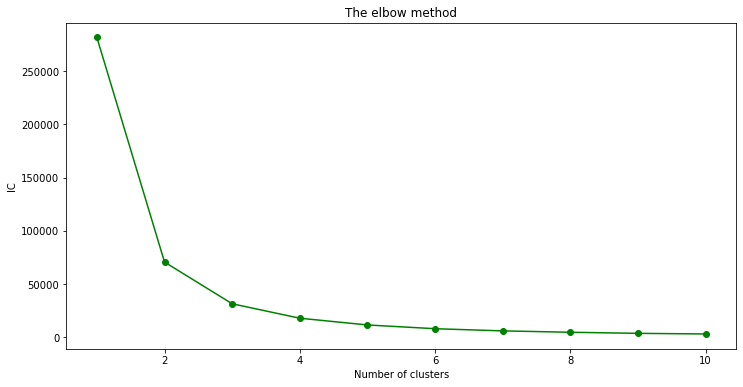

In [10]:
%matplotlib inline
df = pd.DataFrame({'Cluster': range(1,11), 'ic':ic})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['ic'], marker='o',color='green')
plt.xlabel('Number of clusters')
plt.ylabel('IC')#In cluster range
plt.title('The elbow method')
plt.show()

**Hence, the Optimum number of clusters is 3.**

**Step 3:- Clustering**

In [11]:
km = KMeans(n_clusters =3 )
x_pred= km.fit_predict(x.iloc[:, 0:4])
x['clusters']= x_pred

# now creating a separate data frames  with clusters
xa = x[x.clusters==0]
xb = x[x.clusters==1]
xc = x[x.clusters==2]
centroid1= km.cluster_centers_

**Step4:- Visualizing Clusters**

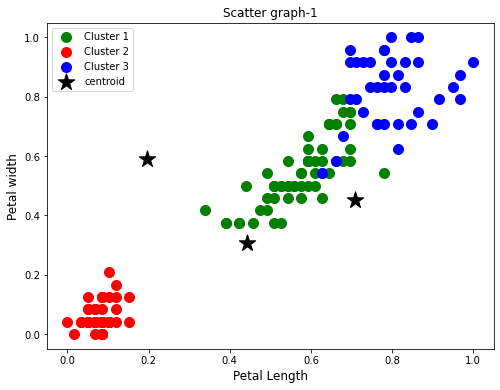

In [12]:
# Creating scatter plot of clusters


plt.figure(figsize=(8,6))
plt.title('Scatter graph-1')
plt.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], s=100,  c='g', label='Cluster 1')
plt.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid1[:, 0], centroid1[:, 1], s=300, c='black', marker='*',label='centroid')


plt.xlabel("Petal Length", size='large')
plt.ylabel("Petal width", size='large')
plt.legend()
plt.show()

**similarly we can create scatter plot of Sepal width**

In [13]:
km1 = KMeans(n_clusters =3 )
y_pred= km1.fit_predict(x.iloc[:, 0:2])
x['clusters_2']= y_pred
# now creating a separate data frames  with clusters
ya = x[x.clusters_2==0]
yb = x[x.clusters_2==1]
yc = x[x.clusters_2==2]
centroid2= km1.cluster_centers_
centroid2

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60034014],
       [0.69562648, 0.45390071]])

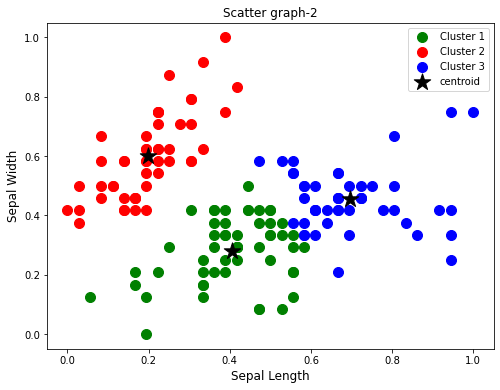

In [14]:
# Creating scatter plot of clusters


plt.figure(figsize=(8,6))
plt.title('Scatter graph-2')
plt.scatter(ya['SepalLengthCm'], ya['SepalWidthCm'], s=100, c='g', label='Cluster 1')
plt.scatter(yb['SepalLengthCm'], yb['SepalWidthCm'], s=100, c='r', label='Cluster 2')
plt.scatter(yc['SepalLengthCm'], yc['SepalWidthCm'], s=100, c='b', label='Cluster 3')
plt.scatter(centroid2[:, 0], centroid2[:, 1], s=300, c='black', marker='*',label='centroid')


plt.xlabel("Sepal Length", size='large')
plt.ylabel("Sepal Width", size='large')
plt.legend()
plt.show()

**3D- Visualization**

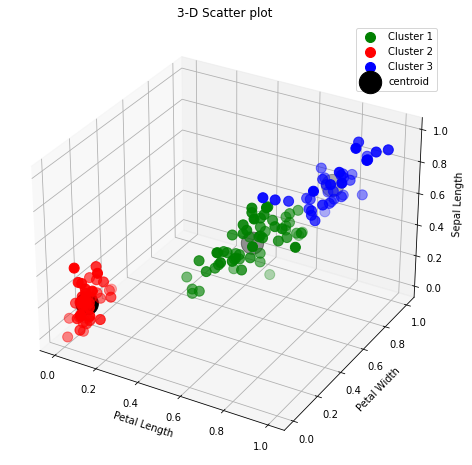

In [15]:
    %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))


ax = fig.add_subplot(projection='3d')
ax.scatter(xa['PetalLengthCm'], xa['PetalWidthCm'], xa['SepalLengthCm'], s=100,  c='g', label='Cluster 1')
ax.scatter(xb['PetalLengthCm'], xb['PetalWidthCm'], xb['SepalLengthCm'], s=100, c='r', label='Cluster 2')
ax.scatter(xc['PetalLengthCm'], xc['PetalWidthCm'], xc['SepalLengthCm'], s=100, c='b', label='Cluster 3')
ax.scatter(centroid1[:, 2], centroid1[:, 3], centroid1[:, 0], s=500, c='black', marker='o',label='centroid')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.set_title('3-D Scatter plot')

ax.legend()



plt.show()

**Hence it can be predicted that the optimum no of clusters is 3 and also we can represent it visually.**